# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

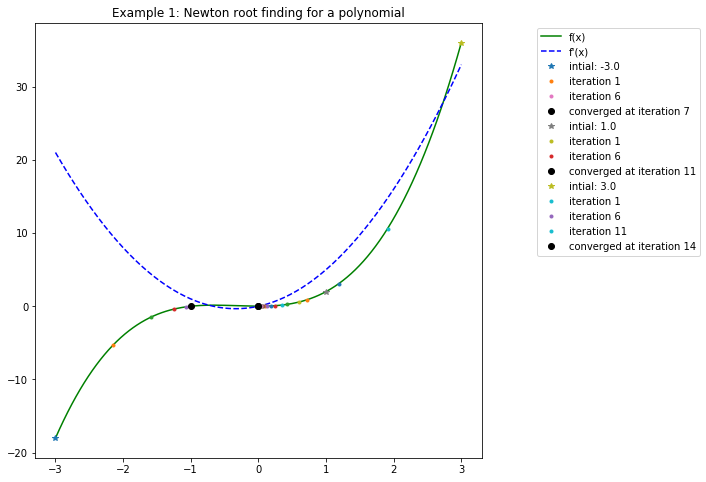

In [2]:
# Example 1: Root finding for cubic polynomial 

n = 200

x = np.linspace(-3, 3, n)  

def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

# Create the polynomial f(x) = x^3 + x^2 

p = np.poly1d([1, 1, 0, 0])

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])

p_d = np.polyder(p)

# Get values for f(x) and f'(x) for graphing purposes

y = fx(x, p)
y_d = fx(x,p_d)

# Try three possible guesses for x0

x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()



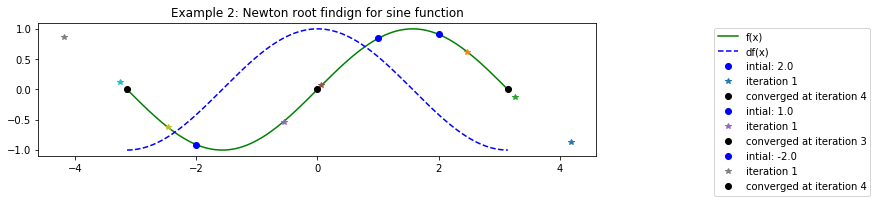

Roots: 3.141593, 0.000000, -3.141593


In [3]:
# Example 2: Root finding for sine function

n = 200

x = np.linspace(-np.pi, np.pi, n)  

def fx(x):  
    f_x = np.sin(x)        
    return f_x

def fx_d(x):    
    return np.cos(x)

# Get f(x) and f'(x) for plotting

y = fx(x)
y_d = fx_d(x)

# Consider three possible starting points

x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx(x0) / fx_d(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

In [4]:

# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))


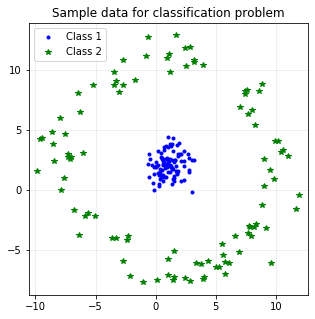

In [5]:
# Plot the data
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

In [6]:
# Split data into training and test datasets

idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [7]:
# Normalization of data
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm

XX = normalization(X)
X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

In [8]:
# define class for logistic regression: batch gradient ascent
class Logistic_BGA:
      
    def __init__(self):
        pass
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logit(self,X,theta):
        z = np.dot(X,theta)
        return self.sigmoid(z)
    
    def h(self, X, theta):
        return self.sigmoid(np.dot(X,theta))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return np.dot(X.transpose(),(y - y_pred))
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X,theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost[0], grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        X = np.insert(X, 0, 1, axis=1)  
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta + alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        X=np.hstack((np.ones((X.shape[0],1)),X))        
        for i in range(0,X.shape[0]):
            y1=self.logit(X[i],theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
   
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        
        return (float(correct)/len(predicted))*100

In [9]:
# define class for logistic regression: batch gradient descent
class Logistic_BGD:
      
    def __init__(self):
        pass
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logit(self,X,theta):
        z = np.dot(X,theta)
        return self.sigmoid(z)
    
    def h(self, X, theta):
        return self.sigmoid(np.dot(X,theta))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        return -1*np.dot(X.transpose(),(y - y_pred))
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X,theta)
        error = -(y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)   
        return cost, grad
    
    def gradientDescent(self, X, y, theta, alpha, num_iters):
        X = np.insert(X, 0, 1, axis=1)  
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        X=np.hstack((np.ones((X.shape[0],1)),X))        
        for i in range(0,X.shape[0]):
            y1=self.logit(X[i],theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
   
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        
        return (float(correct)/len(predicted))*100

In [10]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

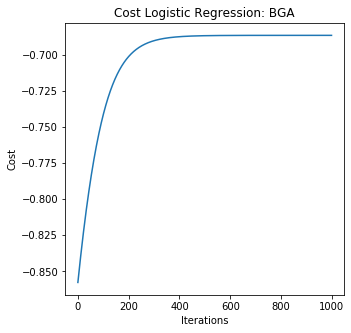

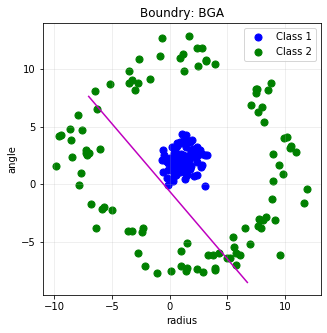

Accuracy BGA method  37.5000


In [11]:
#Batch gradient ascent method
logistic_bga = Logistic_BGA()   
alpha = .0002
num_iters = 1000

m,n = X_train_norm.shape
initial_theta = np.random.rand(n+1,1)
theta_bga , J_history = logistic_bga.gradientAscent(X_train_norm,np.array([y_train]).T,initial_theta,alpha,num_iters)



fig4 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
plt.plot(np.arange(0,num_iters),J_history)            
plt.title('Cost Logistic Regression: BGA')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


fig5 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Boundry: BGA')
plt.xlabel('radius')
plt.ylabel('angle')
plt.grid(axis='both', alpha=.25)
ax.scatter(X1[:,0], X1[:,1], s=50, c='b', marker='o', label='Class 1')
ax.scatter(X2[:,0], X2[:,1], s=50, c='g', marker='o', label='Class 2')
point_1, point_2 = boundary_points(X, theta_bga)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'm-')
plt.legend(loc=0)
plt.show()

#print(theta_bga)
y_pred = logistic_bga.predict(X_test, theta_bga)
print('Accuracy BGA method  %.4f' % logistic_bga.checkAccuracy(y_pred,y_test))

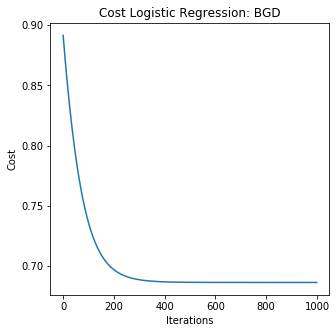

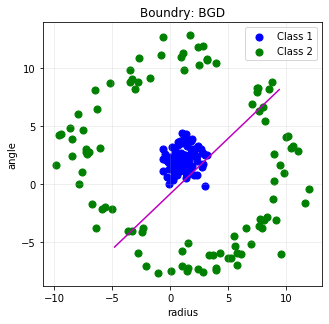

Accuracy BGD method  70.0000


In [12]:
#Batch gradient batch descent method
logistic_bgd = Logistic_BGD()   
alpha = .0002
num_iters = 1000

m,n = X_train_norm.shape
initial_theta = np.random.rand(n+1,1)
theta_bgd , J_history = logistic_bgd.gradientDescent(X_train_norm,np.array([y_train]).T,initial_theta,alpha,num_iters)



fig4 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
plt.plot(np.arange(0,num_iters),J_history)            
plt.title('Cost Logistic Regression: BGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


fig5 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Boundry: BGD')
plt.xlabel('radius')
plt.ylabel('angle')
plt.grid(axis='both', alpha=.25)
ax.scatter(X1[:,0], X1[:,1], s=50, c='b', marker='o', label='Class 1')
ax.scatter(X2[:,0], X2[:,1], s=50, c='g', marker='o', label='Class 2')
point_1, point_2 = boundary_points(X, theta_bgd)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'm-')
plt.legend(loc=0)
plt.show()

#print(theta_bga)
y_pred = logistic_bgd.predict(X_test, theta_bgd)
print('Accuracy BGD method  %.4f' % logistic_bga.checkAccuracy(y_pred,y_test))

## In lab exercises

1. Verify that the gradient ascent solution given above is correct. Plot the optimal decision boundary
   you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


In [13]:
class Logistic_Newton:
      
    def __init__(self):
        pass
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logit(self,X,theta):
        z = np.dot(X,theta)
        return self.sigmoid(z)
    
    def h(self, X, theta):
        return self.sigmoid(np.dot(X,theta))

    def gradient(self, X, y, y_pred):
        m = len(y)
        return 1/m * np.dot(X.T,(y_pred - y))

    def hessian(self, xi, theta):
        y_pred = self.h(xi,theta) # sigmoid output (prediction) 
        xi = xi.reshape(-1,1) # convert from 1d array to 2d (matrix) 
        return xi @ xi.T * (y_pred) * (1-y_pred)
        
    def costFunc(self, theta, X, y):    
        m = len(y)    
        y_pred = self.h(X,theta)
        error = -(y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)    
        return cost, grad
    
    def newton(self, X, y, theta, num_iters):
        X = np.insert(X, 0, 1, axis=1)  
        m = len(y)
        J_history = []
        theta_history = []

        for i in range(num_iters):
            hessian_mat = np.zeros((X.shape[1], X.shape[1]))
            
            for i in range(X.shape[0]):
                hmat_xi = self.hessian(X[i], theta)
                
                hessian_mat += hmat_xi
            cost, grad = self.costFunc(theta, X,y)
            
            theta = theta - np.linalg.inv(hessian_mat) @ grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        X=np.hstack((np.ones((X.shape[0],1)),X))        
        for i in range(0,X.shape[0]):
            y1=self.logit(X[i],theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
   
    def checkAccuracy(self,predicted,y):
        predicted=predicted.tolist()
        y = y.tolist()
        correct=0
        for i in range(0,len(predicted)):
            if y[i]==predicted[i]:
                correct+=1
        
        return (float(correct)/len(predicted))*100

In [14]:
alpha = 0.001
iterations = 1000
init_theta = np.ones((X_train.shape[1]+1))
model_bgd = Logistic_BGD()
theta_bgd, j_hist_bgd = model_bgd.gradientDescent(X_train, y_train, init_theta, alpha, iterations)

In [15]:
iterations = 1000
init_theta = np.ones((X_train.shape[1]+1))
model_newton = Logistic_Newton()
theta_newton, j_hist_newton = model_newton.newton(X_train, y_train, init_theta, iterations)

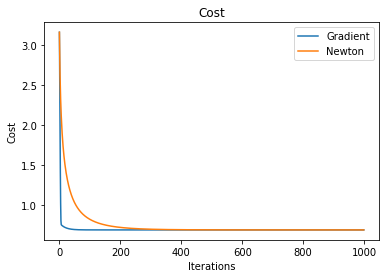

In [16]:
plt.plot(j_hist_bgd, label='Gradient')            
plt.plot(j_hist_newton, label='Newton')
plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [20]:
def boundary_points2(X, theta):
    theta = theta.reshape(-1,1)
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

No handles with labels found to put in legend.


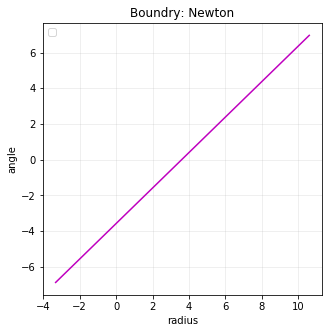

In [21]:
plt.figure(figsize=(5,5)) 
plt.axes()
plt.title('Boundry: Newton')
plt.xlabel('radius')
plt.ylabel('angle')
plt.grid(axis='both', alpha=.25)
ax.scatter(X1[:,0], X1[:,1], s=50, c='b', marker='o', label='Class 1')
ax.scatter(X2[:,0], X2[:,1], s=50, c='g', marker='o', label='Class 2')
point_1, point_2 = boundary_points2(X, theta_newton)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'm-')
plt.legend(loc=0)
plt.show()

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset.

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03.

## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.
